## Tasca M8 T01

##### Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [1]:
# Importació llibreries bàsiques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Primer de tot llegirem el dataset i preparem les dades

In [2]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
# Els valors nuls estàn tots a les quatre últimes columnes
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Eliminarem les columnes amb dades nules i els status id i published per l'exercici. Transformem l'status_type en numeric. El data set queda així:

In [4]:
df = df.drop(['Column1','Column2','Column3','Column4', 'status_id','status_published'], axis=1)  
labels = df['status_type'].unique()
d = dict(zip(labels, range(0,4)))
df['status_type_num']=df['status_type'].map(d)
df = df.drop(['status_type'], axis=1)
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_num
0,529,512,262,432,92,3,1,1,0,0
1,150,0,0,150,0,0,0,0,0,1
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,1
4,213,0,0,204,9,0,0,0,0,1


In [5]:
# I els dtypes així:
df.dtypes

num_reactions      int64
num_comments       int64
num_shares         int64
num_likes          int64
num_loves          int64
num_wows           int64
num_hahas          int64
num_sads           int64
num_angrys         int64
status_type_num    int64
dtype: object

#### K-means

In [6]:
# Importem les llibreríes específiques
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize


In [7]:
# Definim les features i les labels
features = df
#labels = df['labels']

In [8]:
# First we normalize the data
scaled_features = normalize(df)
scaled_features = pd.DataFrame(scaled_features, columns=df.columns)
scaled_features.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_num
0,0.589334,0.570395,0.291882,0.481271,0.102493,0.003342,0.001114,0.001114,0.0,0.000000
1,0.707099,0.000000,0.000000,0.707099,0.000000,0.000000,0.000000,0.000000,0.0,0.004714
2,0.581225,0.604269,0.145946,0.522334,0.053770,0.002560,0.002560,0.000000,0.0,0.000000
3,0.707092,0.000000,0.000000,0.707092,0.000000,0.000000,0.000000,0.000000,0.0,0.006370
4,0.721860,0.000000,0.000000,0.691359,0.030501,0.000000,0.000000,0.000000,0.0,0.003389


In [9]:
# Normalitzem les features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)
# scaled_features[:5]

Mirarem de trobar el nombre de clusters ideals amb un elbow plot

In [10]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Posem els valors SSE (Sum Squared Error) en ua llista
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fba58d9bee0>
Traceback (most recent call last):
  File "/home/jordi/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/jordi/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/jordi/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/jordi/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

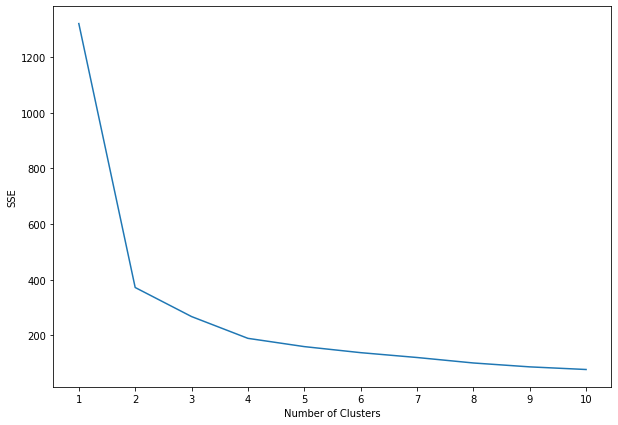

In [20]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.savefig('Sum_Squared_error.png')

En el gràfic anterior el punt ideal pel nombre de clusters és aquell punt on SSE (Sum Squared Error) és menor en el menor número de clusters possible. Sembla que l'ideal serien 2 clusters. Anem a veure-ho pel silhouete plot:

In [12]:
# Llista pels coeficients de silhouete en per cada k
silhouette_coefficients = []

#Calculem Apendem els valors de silhouette_score i els posem a la llista
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

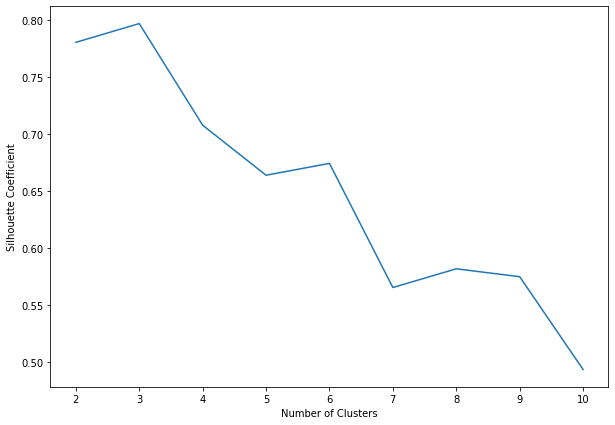

In [21]:
fig, ax = plt.subplots(figsize=(10,7))

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.savefig('Silhouette Coefficient.png')

En aquest cas sembla que un número de clusters 2 o 3 seria ideal.

In [14]:
# N-cluster=2

kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(scaled_features)

# Menos SSE
print(kmeans.inertia_)

# On es troben els centroides dels clusters
print(kmeans.cluster_centers_)

# Numero d`iteraccions per convergir
print(kmeans.n_iter_)

# Silhouette score
score = silhouette_score(scaled_features, kmeans.labels_)
print (score)

371.6332855816635
[[2.75912243e-01 7.57373422e-01 1.93765561e-01 2.12816171e-01
  5.72109245e-02 2.77616873e-03 2.24439148e-03 4.97374785e-04
  3.65513228e-04 2.37741299e-02]
 [7.03131827e-01 6.71690539e-02 1.73312093e-02 6.90474924e-01
  8.16158208e-03 2.38736696e-03 8.95510275e-04 9.52355360e-04
  2.53470531e-04 3.22270759e-02]]
4
0.7801813110734024


In [15]:
# N-cluster=3

kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(scaled_features)

# Menos SSE
print(kmeans.inertia_)

# On es troben els centroides dels clusters
print(kmeans.cluster_centers_)

# Numero d`iteraccions per convergir
print(kmeans.n_iter_)

# Silhouette score
score = silhouette_score(scaled_features, kmeans.labels_)
print (score)

267.06240013626996
[[3.06186953e-01 8.45411202e-01 2.03829822e-01 2.35876031e-01
  6.37757256e-02 3.07677620e-03 2.49767155e-03 5.56332758e-04
  4.04416207e-04 3.07608237e-03]
 [7.03196395e-01 6.72768575e-02 1.73380637e-02 6.90608071e-01
  8.08633938e-03 2.39164214e-03 8.97136506e-04 9.52519729e-04
  2.53698237e-04 3.19920708e-02]
 [2.28144216e-02 1.04091914e-02 1.07883102e-01 1.75403545e-02
  5.13032814e-03 7.13866376e-05 4.32608607e-05 0.00000000e+00
  2.90914759e-05 2.07306086e-01]]
7
0.7966258228618696


La tria del número de clusters depèn d'aquestes mètriques utilitzades però també del coneixement de les dades i el problema que volem solucionar. En aquest exercíci hem utilitzat l'status type com a fteritzaben correctament els quatre tipus de dades.

### Hierarchical Clustering 

In [16]:
# Recordem les features ja escalades
scaled_features.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_num
0,0.589334,0.570395,0.291882,0.481271,0.102493,0.003342,0.001114,0.001114,0.0,0.000000
1,0.707099,0.000000,0.000000,0.707099,0.000000,0.000000,0.000000,0.000000,0.0,0.004714
2,0.581225,0.604269,0.145946,0.522334,0.053770,0.002560,0.002560,0.000000,0.0,0.000000
3,0.707092,0.000000,0.000000,0.707092,0.000000,0.000000,0.000000,0.000000,0.0,0.006370
4,0.721860,0.000000,0.000000,0.691359,0.030501,0.000000,0.000000,0.000000,0.0,0.003389


Farem el dendograma per triar el número de clusters a ser utilitzats

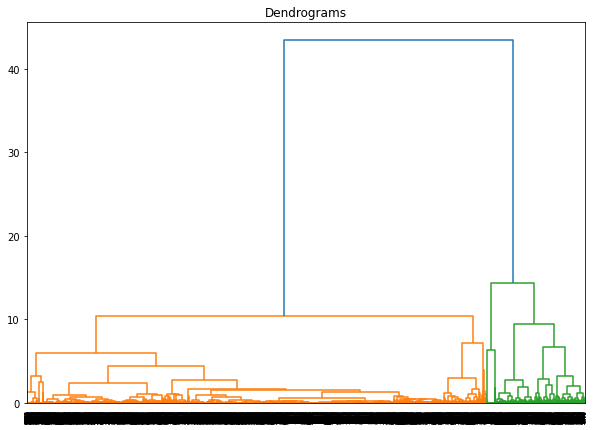

In [17]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))



En aquest cas fariam un tall horitzonatl a la línea blava (més distància) el que ens deixaria amb dos clustersÇ

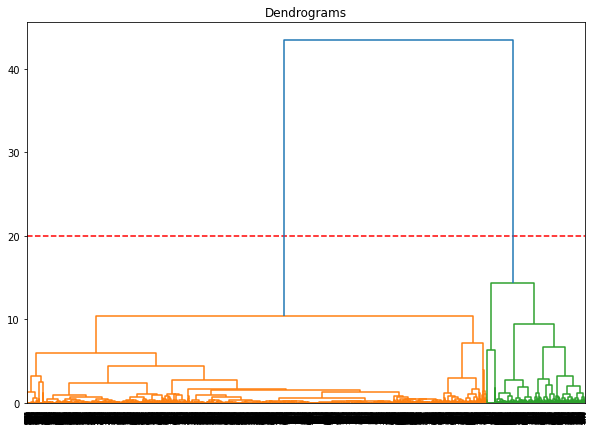

In [22]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.axhline(y=20, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))

plt.savefig('Dendogram.png')

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaled_features)

array([0, 1, 0, ..., 1, 1, 1])

Finalment podem observar gràficament com les dades estàn separades en dos clusters. Mostrem dos exemples i al final el silhouette score per aquest model.

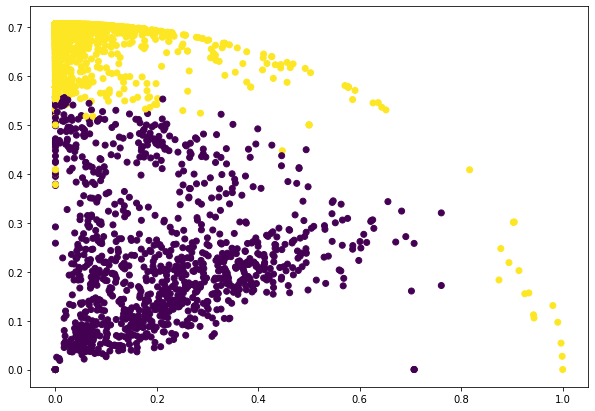

In [25]:
plt.figure(figsize=(10, 7))  
plt.scatter(scaled_features['num_shares'], scaled_features['num_likes'], c=cluster.labels_) 

plt.savefig('clusterized_ex1.png')

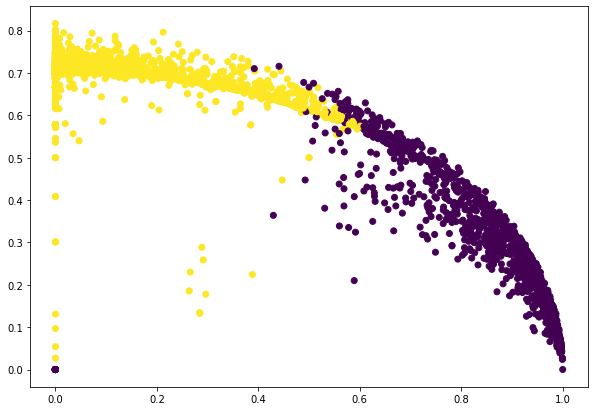

In [24]:
plt.figure(figsize=(10, 7))  
plt.scatter(scaled_features['num_comments'], scaled_features['num_reactions'], c=cluster.labels_) 

plt.savefig('clusterized_ex2.png')

In [ ]:
# Silhouette score
score = silhouette_score(scaled_features, cluster.labels_)
print (score)